# Bloomington Places Summary

This file shows information about places in Bloomington regardless of where the visitors are coming from.

This CSV is the result of a query across all of my 8 tables in BigQuery that hold visit data for January - April 2019 and January - April 2020.

Most importantly, this data contains the North American Industry Classification System (NAICS) code for each establishment (which my previous datasets did not include), so I can easily query this data for specific _types_ of establishments (restaurants, etc.)

It also contains some custom fields (latlong, etc.) that were to be used in Google Data Studio.

In [81]:
import pandas as pd
import altair as alt
import ast
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

In [2]:
# Examine Bloomington place data without regard to CBG or population

bton_places = pd.read_csv('bton_place_data/visits_monthly_summary.csv')
bton_places.tail()

,safegraph_place_id,location_name,naics_code,latitude,longitude,latlong,street_address,city,region,postal_code,...,date_range_end,month,year,raw_visit_counts,raw_visitor_counts,visits_by_day,poi_cbg,visitor_home_cbgs,popularity_by_hour,popularity_by_day
13903,sg:83cd5c368e584d85b153fe72a404ef4e,The Prep School,611110.0,39.178768,-86.539315,"39.178768,-86.539315",525 W 17th St,Bloomington,IN,47404,...,2020-03-01 05:00:00 UTC,2,2020,18,13,"[0,1,1,2,0,0,1,0,0,3,1,0,0,1,0,2,1,0,0,1,1,1,0...",181050006012,{},"[1,1,2,1,1,2,3,2,3,3,3,2,2,2,2,4,1,2,1,3,3,6,5,3]","{""Monday"":5,""Tuesday"":3,""Wednesday"":0,""Thursda..."
13904,sg:83cd5c368e584d85b153fe72a404ef4e,The Prep School,611110.0,39.178768,-86.539315,"39.178768,-86.539315",525 W 17th St,Bloomington,IN,47404,...,2020-04-01 04:00:00 UTC,3,2020,25,13,"[1,1,0,0,0,2,0,0,1,1,1,2,1,0,3,0,2,2,1,2,0,1,0...",181050006012,"{""181050013033"":5,""181050013031"":4,""1810500060...","[8,8,8,7,7,8,8,8,8,7,7,8,12,10,11,9,9,8,5,3,8,...","{""Monday"":2,""Tuesday"":3,""Wednesday"":3,""Thursda..."
13905,sg:83cd5c368e584d85b153fe72a404ef4e,The Prep School,611110.0,39.178768,-86.539315,"39.178768,-86.539315",525 W 17th St,Bloomington,IN,47404,...,2020-02-01 05:00:00 UTC,1,2020,31,19,"[0,0,1,0,0,6,3,1,1,3,2,0,1,1,0,1,0,0,0,0,0,0,2...",181050006012,"{""181050013043"":4,""181050002021"":4,""1809395080...","[6,6,4,3,3,3,3,3,4,5,4,6,6,6,4,8,7,6,4,3,6,8,6,6]","{""Monday"":8,""Tuesday"":4,""Wednesday"":3,""Thursda..."
13906,sg:83cd5c368e584d85b153fe72a404ef4e,The Prep School,611110.0,39.178768,-86.539315,"39.178768,-86.539315",525 W 17th St,Bloomington,IN,47404,...,2019-04-01 04:00:00 UTC,3,2019,62,25,"[2,1,0,0,3,2,3,2,0,1,0,1,1,0,1,0,0,4,1,3,3,4,0...",181050006012,"{""181050006021"":9,""181050004021"":4}","[16,15,14,13,12,13,12,12,14,14,14,8,7,8,9,10,1...","{""Monday"":9,""Tuesday"":12,""Wednesday"":11,""Thurs..."
13907,sg:83cd5c368e584d85b153fe72a404ef4e,The Prep School,611110.0,39.178768,-86.539315,"39.178768,-86.539315",525 W 17th St,Bloomington,IN,47404,...,2019-02-01 05:00:00 UTC,1,2019,29,11,"[0,2,0,0,0,0,4,0,1,0,3,2,3,0,1,3,0,1,0,1,3,0,0...",181050006012,"{""181050010013"":4,""181050006021"":4}","[6,9,10,9,8,8,9,9,8,6,4,2,3,3,3,1,3,4,2,7,8,6,...","{""Monday"":7,""Tuesday"":1,""Wednesday"":7,""Thursda..."


In [4]:
bton_places.dtypes

safegraph_place_id     object
location_name          object
naics_code            float64
latitude              float64
longitude             float64
latlong                object
street_address         object
city                   object
region                 object
postal_code             int64
category_tags          object
range_date             object
date_range_end         object
month                   int64
year                    int64
raw_visit_counts        int64
raw_visitor_counts      int64
visits_by_day          object
poi_cbg                 int64
visitor_home_cbgs      object
popularity_by_hour     object
popularity_by_day      object
dtype: object

In [5]:
bton_places.shape

(13908, 22)

## Popular Bars in Bloomington

A simple question might be to ask which bars in Bloomington are the most popular.

The NAICS code for "Drinking Places (Alcoholic Beverages)" is 722410.

In [17]:
bton_bars = bton_places[bton_places.naics_code==722410].groupby(["safegraph_place_id", "location_name"], as_index = False)["raw_visit_counts"].sum()
bton_bars.head()

,safegraph_place_id,location_name,raw_visit_counts
0,sg:3c8743f25ff94d218e9222302a62bad7,Westside Beer Bar,87
1,sg:3e4140ecff83453c8eaccc6f717e3025,VFW 604 Bars,784
2,sg:3e7885ec1d9441118c5b593c61a8a10d,Blockhouse Bar,320
3,sg:4ac19225f5fb433e9808ace61b2446e5,Hoppy Wobbles,1676
4,sg:b2d20de626454dcfbf78650a980d03b2,Video Saloon,3078


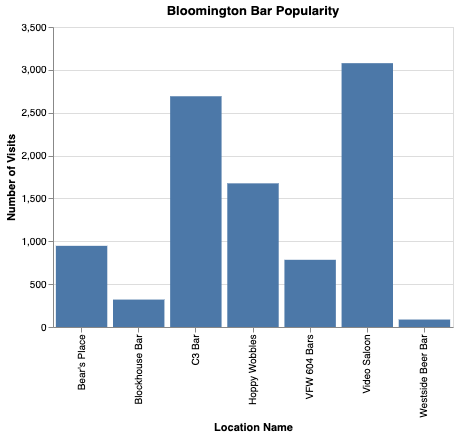

In [22]:
# Chart of most popular bars in Bloomington by raw number of visits in Jan-April 2019 and Jan-April 2020
alt.Chart(bton_bars).mark_bar().encode(
    alt.X('location_name:N',
         axis=alt.Axis(title='Location Name')),
    alt.Y('raw_visit_counts:Q',
         axis=alt.Axis(title='Number of Visits'))
).properties(
    title='Bloomington Bar Popularity'
)

The problem with this is that NAICS codes bars that serve food in a different category.  Therefore, some of the most popular bars (Nick's English Hut, The Irish Lion, etc.) are actually "restaurants."

In [21]:
bton_bars_food = bton_places[
    (bton_places.naics_code==722410) | 
    (bton_places.naics_code==722511)
    ].groupby(["safegraph_place_id", "location_name"], as_index = False)["raw_visit_counts"].sum()
bton_bars_food.head()

,safegraph_place_id,location_name,raw_visit_counts
0,sg:00e61973a2b646c0ba85b11dc5c911ff,Bck Restaurants,162
1,sg:015b2077c9ad4fe6b91b4b6f31c2f0f8,Kilroy's Sports Bar,3988
2,sg:016fbe8f44164eca9b9b0c893eb5de2f,116 Buffet Seafood Sushi and Grill,8
3,sg:032add8f7a4e4bdc859e945dfc3af58f,Kebab On Wheels,1719
4,sg:0576e77a4810479cbe0a0ee0851d7385,Rainbow Bakery,230


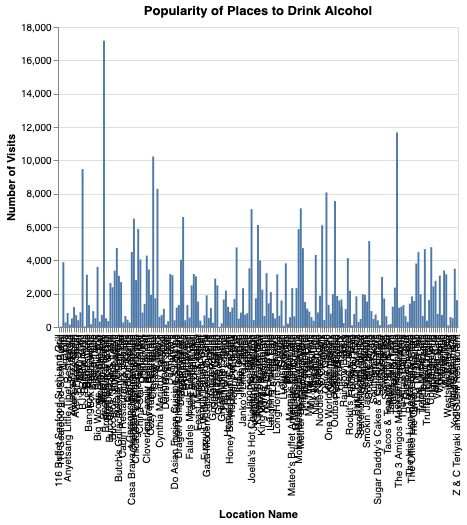

In [23]:
# Chart of most popular places in Bloomington that sell alcohol by raw number of visits in Jan-April 2019 and Jan-April 2020
alt.Chart(bton_bars_food).mark_bar().encode(
    alt.X('location_name:N',
         axis=alt.Axis(title='Location Name')),
    alt.Y('raw_visit_counts:Q',
         axis=alt.Axis(title='Number of Visits'))
).properties(
    title='Popularity of Places to Drink Alcohol'
)

That's a ton of restaurants, so let's just find the top 20.

In [26]:
bton_bars_food = bton_bars_food.sort_values(by='raw_visit_counts', ascending=False)
bton_bars_food.head()

,safegraph_place_id,location_name,raw_visit_counts
176,sg:e546957610e241a2bcc386bb297899ae,Bookmarket Eatery,17180
171,sg:e0dfd61ea93c445091f4c2f0f7a18f08,Texas Roadhouse,11672
33,sg:24ed75e014c74420a41a588f40b786ec,Cracker Barrel,10227
181,sg:e92f164c77f64e2aa846d2a4f0a7d219,BJ's Restaurants,9475
78,sg:5d04f19f907e43649f5dc3e4567c8685,Culver's,8286


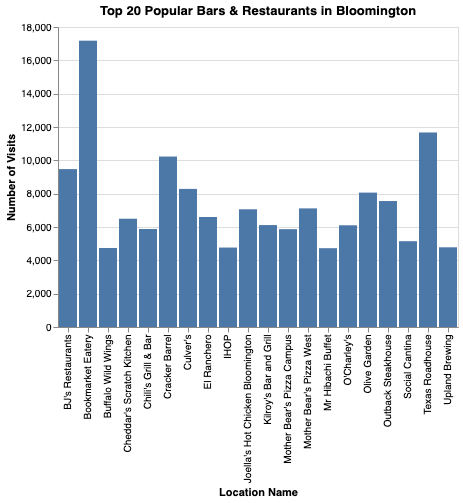

In [28]:
# Chart of Top 20 most popular places in Bloomington that sell alcohol by raw number of visits in Jan-April 2019 and Jan-April 2020
alt.Chart(bton_bars_food[:20]).mark_bar().encode(
    alt.X('location_name:N',
         axis=alt.Axis(title='Location Name')),
    alt.Y('raw_visit_counts:Q',
         axis=alt.Axis(title='Number of Visits'))
).properties(
    title='Top 20 Popular Bars & Restaurants in Bloomington'
)

As you can see, this is a difficult question to answer because our data doesn't include a distinction between establishments that serve alcohol and those that don't.  Many of the establishments in the Top 20 don't serve alcohol: Culver's, IHOP, etc.

But the data does show popularity by hour, so it's possible that we can determine when each type of establishment is most popular.

In [71]:
# Recreate our dining establishments dataframe to include just one month
bton_bars_food = bton_places[['naics_code', 'popularity_by_hour']]
bton_bars_food = bton_bars_food[(
        (bton_places.naics_code==722410) | 
        (bton_places.naics_code==722511)
    ) & (
        bton_places.month==1
    ) & (
        bton_places.year==2019
    )
    ]
bton_bars_food.head()

,naics_code,popularity_by_hour
23,722511.0,"[4,6,8,7,5,5,5,11,11,13,14,14,15,23,22,22,17,1..."
65,722511.0,"[101,101,102,101,103,104,101,100,91,81,75,70,8..."
110,722511.0,"[25,32,29,34,20,19,32,34,38,61,71,77,77,81,69,..."
170,722511.0,"[81,74,66,72,90,95,93,96,93,91,90,110,136,133,..."
319,722511.0,"[16,17,18,17,18,16,15,30,29,29,30,39,35,33,33,..."


In [72]:
# Now split the popularity by hour array

hour_columns = []

def expand(row):
    # Have to convert the string stored in popularity_by_hour to an actual Python list
    popularity = ast.literal_eval(row.popularity_by_hour)
    counter = 0
    for item in popularity:
        column_name = 'hour' + str(counter)
        hour_columns.append(column_name)
        row[column_name] = item
        counter = counter+1
    return row

bton_bars_food = bton_bars_food.apply(expand, axis=1)
bton_bars_food.drop(columns='popularity_by_hour', inplace=True)
bton_bars_food.head()

,naics_code,hour0,hour1,hour2,hour3,hour4,hour5,hour6,hour7,hour8,...,hour14,hour15,hour16,hour17,hour18,hour19,hour20,hour21,hour22,hour23
23,722511.0,4,6,8,7,5,5,5,11,11,...,22,22,17,17,14,20,22,18,9,4
65,722511.0,101,101,102,101,103,104,101,100,91,...,73,73,76,100,116,107,137,140,123,107
110,722511.0,25,32,29,34,20,19,32,34,38,...,69,46,36,32,20,24,35,39,28,22
170,722511.0,81,74,66,72,90,95,93,96,93,...,126,133,136,155,157,167,203,167,114,94
319,722511.0,16,17,18,17,18,16,15,30,29,...,33,34,29,12,5,7,11,13,15,17


In [75]:
# Melt the dataframe
bton_bars_food_popularity = pd.melt(bton_bars_food, 
                                    id_vars=['naics_code'], 
                                    value_vars=hour_columns,
                                    var_name='hour',
                                    value_name='visits')
bton_bars_food_popularity

,naics_code,hour,visits
0,722511.0,hour0,4
1,722511.0,hour0,101
2,722511.0,hour0,25
3,722511.0,hour0,81
4,722511.0,hour0,16
...,...,...,...
907915,722511.0,hour23,31
907916,722511.0,hour23,38
907917,722511.0,hour23,7
907918,722511.0,hour23,0


In [77]:
# Sum it up so that we get one row for each hour for each NAICS code
pop_by_hour = bton_bars_food_popularity.groupby(["naics_code", "hour"], as_index = False)["visits"].sum()
pop_by_hour = pop_by_hour.sort_values(by=['hour', 'naics_code'])
pop_by_hour

,naics_code,hour,visits
0,722410.0,hour0,33735
24,722511.0,hour0,715260
1,722410.0,hour1,25350
25,722511.0,hour1,621270
2,722410.0,hour10,25935
26,722511.0,hour10,998205
3,722410.0,hour11,25740
27,722511.0,hour11,1381185
4,722410.0,hour12,30225
28,722511.0,hour12,1779960


In [78]:
# Now make a violin plot

alt.Chart(pop_by_hour).transform_density(
    'visits',
    as_=['visits', 'density'],
    extent=[5, 50],
    groupby=['naics_code']
).mark_area(orient='horizontal').encode(
    y='visits:Q',
    color='naics_code:N',
    x=alt.X(
        'density:Q',
        stack='center',
        impute=None,
        title=None,
        axis=alt.Axis(labels=False, values=[0],grid=False, ticks=True),
    ),
    column=alt.Column(
        'naics_code:N',
        header=alt.Header(
            titleOrient='bottom',
            labelOrient='bottom',
            labelPadding=0,
        ),
    )
).properties(
    width=100
).configure_facet(
    spacing=0
).configure_view(
    stroke=None
)


AttributeError: 'Chart' object has no attribute 'transform_density'

In [80]:
alt.Chart(pop_by_hour).transform_fold(
    [722410.0, 722511.0],
    as_=['Experiment', 'Measurement']
).mark_area(
    opacity=0.3,
    interpolate='step'
).encode(
    alt.X('hour:N', bin=alt.Bin(maxbins=100)),
    alt.Y('visits:Q', stack=None),
    alt.Color('Experiment:N')
)

SchemaValidationError: Invalid specification

        altair.vegalite.v3.schema.core.FoldTransform->fold->items, validating 'type'

        722410.0 is not of type 'string'
        